In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [2]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)

    return df

In [3]:
df_1998 = pd.read_csv('../data/clean/1998_Election_Data.csv')
df_2002 = pd.read_csv('../data/clean/2002_Election_Data.csv')
df_2006 = pd.read_csv('../data/clean/2006_Election_Data.csv')
df_2010 = pd.read_csv('../data/clean/2010_Election_Data.csv')
df_2014 = pd.read_csv('../data/clean/2014_Election_Data.csv')
df_2018 = pd.read_csv('../data/clean/2018_Election_Data.csv')

In [4]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


,Unnamed: 0,election_year,election_round,place_(zz_=_exterior),municipality_code,municipality_name,office,party_initials,party_number,party_name,number_of_votes,unnamed:_4
0,0,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDC,27,PARTIDO SOCIAL DEMOCRATA CRISTAO,1,NaN
1,1,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT do B,70,PARTIDO TRABALHISTA DO BRASIL,3,NaN
2,2,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PT,13,PARTIDO DOS TRABALHADORES,10,NaN
3,3,1998,1,ZZ,98787,AFRICA DO SUL,PRESIDENTE,PSDB,45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,54,NaN
4,4,1998,1,ZZ,11100,ALEMANHA,PRESIDENTE,PTN,19,PARTIDO TRABALHISTA NACIONAL,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1534,2018,1,ZZ,11142,ARGENTINA,Presidente,PODE,19,PODEMOS,46,NaN
5593,1535,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PPL,54,PARTIDO PATRIA LIVRE,4,NaN
5594,1536,2018,1,ZZ,11266,ESTADOS UNIDOS,Presidente,PODE,19,PODEMOS,39,NaN
5595,1537,2018,1,ZZ,11282,FRANCA,Presidente,PODE,19,PODEMOS,30,NaN


In [5]:
def plot_total_votes(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "number_of_votes"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["number_of_votes"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Electorate Population")
    plt.title("Brazilian Immigrant Voting Numbers by Year")

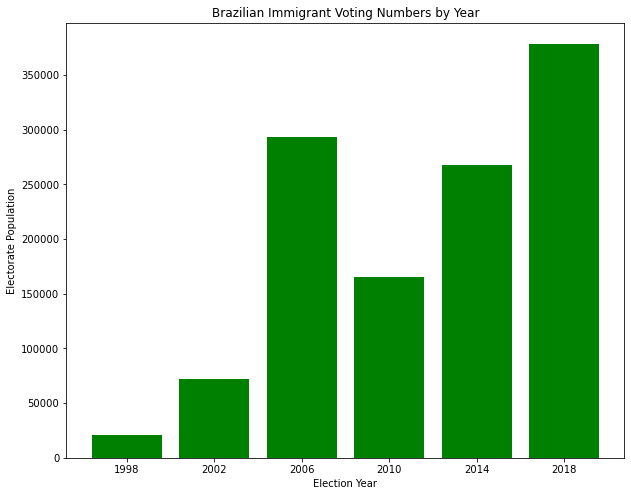

In [6]:
plot_total_votes(df_combined)

In [7]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries that saw Brazilian immigrants vote by Year")

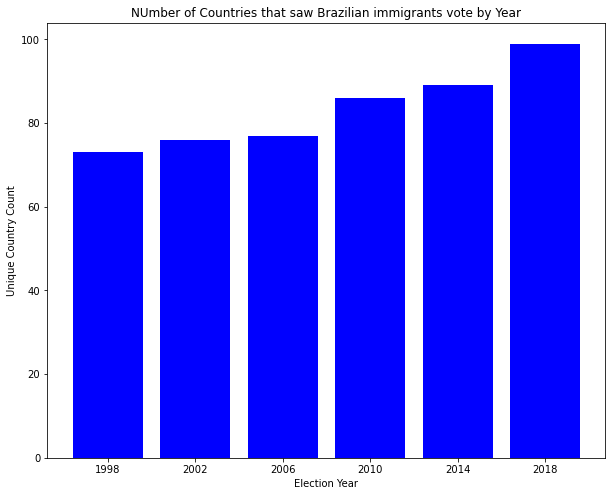

In [8]:
plot_total_countries(df_combined)

In [9]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [10]:
countries = calculate_country_pop(df_combined)

In [11]:
countries1 = countries.sort_values(by=[1998], ascending=False)
countries1.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [12]:
countries2 = countries.sort_values(by=[2002], ascending=False)
countries2.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0
11800,BOLIVIA,1115.0,1562.0,4699.0,1935.0,2462.0,3080.0


In [13]:
countries3 = countries.sort_values(by=[2006], ascending=False)
countries3.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11282,FRANCA,881.0,2038.0,8661.0,3895.0,6227.0,8732.0
11320,GUIANA FRANCESA,753.0,1653.0,7856.0,3454.0,3564.0,3025.0


In [14]:
countries4 = countries.sort_values(by=[2010], ascending=False)
countries4.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11142,ARGENTINA,424.0,1088.0,7732.0,4577.0,5431.0,6856.0


In [15]:
countries5 = countries.sort_values(by=[2014], ascending=False)
countries5.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11444,PARAGUAI,458.0,1332.0,10047.0,4547.0,6769.0,8450.0


In [16]:
countries6 = countries.sort_values(by=[2018], ascending=False)
countries6.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,4345.0,26772.0,97985.0,51820.0,75862.0,107078.0
11380,JAPAO,254.0,532.0,1666.0,12063.0,42402.0,59676.0
11509,PORTUGAL,1502.0,7343.0,27822.0,15087.0,19295.0,24980.0
98906,CANADA,911.0,2196.0,11214.0,7749.0,13819.0,23852.0
98841,INGLATERRA,590.0,3217.0,12640.0,6192.0,11627.0,17848.0
11100,ALEMANHA,1359.0,2584.0,9750.0,6119.0,11780.0,16996.0
11525,SUICA,905.0,1469.0,7310.0,7357.0,11771.0,15620.0
11363,ITALIA,1940.0,4518.0,16616.0,10564.0,12943.0,15519.0
11240,ESPANHA,341.0,1547.0,5235.0,3853.0,6143.0,10937.0


In [24]:
def votes_by_party(df):
    countries = df.groupby(["party_number", "party_name", "party_initials", "election_year"]).number_of_votes.sum().unstack()
    countries = countries.fillna(0)
    
    
    return countries

In [25]:
votings = votes_by_party(df_combined)
votings = votings.sort_values(by=[1998], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
23,PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,PRONA,307.0,0.0,0.0,0.0,0.0,0.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
70,PARTIDO TRABALHISTA DO BRASIL,PT do B,86.0,0.0,0.0,0.0,0.0,0.0
19,PARTIDO TRABALHISTA NACIONAL,PTN,85.0,0.0,0.0,0.0,0.0,0.0
33,PARTIDO DA MOBILIZACAO NACIONAL,PMN,61.0,0.0,0.0,0.0,0.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0


In [26]:
votings = votings.sort_values(by=[2002], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
23,PARTIDO POPULAR SOCIALISTA,PPS,1407.0,4342.0,0.0,0.0,0.0,0.0
40,PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
29,PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0
54,PARTIDO PATRIA LIVRE,PPL,0.0,0.0,0.0,0.0,0.0,153.0
15,MOVIMENTO DEMOCRATICO BRASILEIRO,MDB,0.0,0.0,0.0,0.0,0.0,952.0
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0


In [27]:
votings = votings.sort_values(by=[2006], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
12,PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
44,PARTIDO REPUBLICANO PROGRESSISTA,PRP,0.0,0.0,637.0,0.0,0.0,0.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
56,PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL,PRONA,307.0,0.0,0.0,0.0,0.0,0.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0


In [28]:
votings = votings.sort_values(by=[2010], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0
21,PARTIDO COMUNISTA BRASILEIRO,PCB,0.0,0.0,0.0,253.0,261.0,0.0
28,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
29,PARTIDO DA CAUSA OPERARIA,PCO,0.0,102.0,0.0,68.0,73.0,0.0


In [29]:
votings = votings.sort_values(by=[2014], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
40,PARTIDO SOCIALISTA BRASILEIRO,PSB,0.0,3675.0,0.0,0.0,34527.0,0.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
43,PARTIDO VERDE,PV,118.0,0.0,0.0,17222.0,2067.0,0.0
20,PARTIDO SOCIAL CRISTAO,PSC,23.0,0.0,0.0,0.0,906.0,0.0
16,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,45.0,204.0,0.0,541.0,648.0,349.0
28,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,0.0,0.0,0.0,200.0,436.0,0.0
27,PARTIDO SOCIAL DEMOCRATA CRISTAO,PSDC,17.0,0.0,131.0,357.0,281.0,0.0


In [30]:
votings = votings.sort_values(by=[2018], ascending=False)
votings.head(10)

,,election_year,1998,2002,2006,2010,2014,2018
party_number,party_name,party_initials,,,,,,
17,PARTIDO SOCIAL LIBERAL,PSL,0.0,0.0,129.0,0.0,0.0,245361.0
13,PARTIDO DOS TRABALHADORES,PT,4885.0,39365.0,133996.0,64148.0,55412.0,73270.0
12,PARTIDO DEMOCRATICO TRABALHISTA,PDT,0.0,0.0,1822.0,0.0,0.0,28073.0
30,PARTIDO NOVO,NOVO,0.0,0.0,0.0,0.0,0.0,13637.0
45,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,13848.0,23960.0,153700.0,81846.0,169834.0,6668.0
18,REDE SUSTENTABILIDADE,REDE,0.0,0.0,0.0,0.0,0.0,4961.0
19,PODEMOS,PODE,0.0,0.0,0.0,0.0,0.0,2733.0
50,PARTIDO SOCIALISMO E LIBERDADE,PSOL,0.0,0.0,3294.0,693.0,3474.0,1274.0
51,PATRIOTA,PATRI,0.0,0.0,0.0,0.0,0.0,1172.0
